In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import pandas as pd
import time as time
%matplotlib inline
from IPython.display import display, clear_output

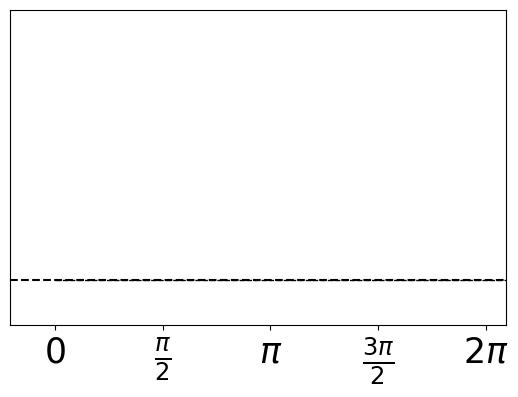

In [131]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# 1) Ellipse definition (semi-axes a, b).
a, b = 1, 2.0  # longer axis is initially horizontal

# 2) Parameter for ellipse boundary
def ellipse_xy(t):
    return a*np.cos(t), b*np.sin(t)

def ellipse_xy_prime(t):
    return -a*np.sin(t), b*np.cos(t)

# 3) Arc length S(t)
t_fine = np.linspace(0, 2*np.pi-1e-4, 2001)
x_fine, y_fine = ellipse_xy(t_fine)
dx_fine, dy_fine = ellipse_xy_prime(t_fine)
ds = np.sqrt(dx_fine**2 + dy_fine**2)*(t_fine[1] - t_fine[0])
S_fine = np.cumsum(ds)
S_fine -= S_fine[0]  # Ensure S(0) = 0
perimeter = S_fine[-1]

def S_of_t(t):
    t_mod = np.mod(t, 2*np.pi-1e-4)
    frac = t_mod / (2*np.pi-1e-4)
    idx = frac * (len(t_fine) - 1)
    i0 = int(idx)
    i1 = min(i0+1, len(t_fine)-1)
    w = idx - i0
    return (1-w)*S_fine[i0] + w*S_fine[i1]

def tangent_angle(t):
    dx, dy = ellipse_xy_prime(t)
    return np.arctan2(dy, dx)

# 4) Precompute center trajectory
N_FRAMES = 200
t_vals = np.linspace(0, 2*np.pi, N_FRAMES)
center_x = np.zeros_like(t_vals)
center_y = np.zeros_like(t_vals)

for i, t_c in enumerate(t_vals):
    contact_x = S_of_t(t_c)
    contact_y = 0
    alpha = -tangent_angle(t_c)
    cosA, sinA = np.cos(alpha), np.sin(alpha)
    xc_loc, yc_loc = ellipse_xy(t_c)
    cx_local_rot = cosA*xc_loc - sinA*yc_loc
    cy_local_rot = sinA*xc_loc + cosA*yc_loc
    center_x[i] = contact_x - cx_local_rot
    center_y[i] = contact_y - cy_local_rot

# 5) Animation setup
fig, ax = plt.subplots()
tick_positions = np.linspace(0, 9.55, 5)
tick_labels = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 3*b)
ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, fontsize=25)
ax.get_yaxis().set_visible(False)

ax.hlines(0, xmin=-2, xmax=12, linestyle='--', color='black')

ax.plot([0, perimeter+5], [0, 0], 'k--', lw=1)
ellipse_line, = ax.plot([], [], lw=2)
center_trace, = ax.plot([], [], color='red', ms=3)

theta_draw = np.linspace(0, 2*np.pi, 300)

def init():
    ellipse_line.set_data([], [])
    center_trace.set_data([], [])
    return ellipse_line, center_trace

def update(frame):
    t_c = t_vals[frame]
    cx, cy = center_x[frame], center_y[frame]
    alpha = -tangent_angle(t_c)
    cosA, sinA = np.cos(alpha), np.sin(alpha)

    x_loc = a*np.cos(theta_draw)
    y_loc = b*np.sin(theta_draw)
    x_rot = cosA*x_loc - sinA*y_loc
    y_rot = sinA*x_loc + cosA*y_loc
    x_glob = x_rot + cx
    y_glob = y_rot + cy
    
    ellipse_line.set_data(x_glob, y_glob)
    center_trace.set_data(center_x[:frame+1], center_y[:frame+1])
    return ellipse_line, center_trace

ani = FuncAnimation(
    fig, update, frames=N_FRAMES, 
    init_func=init, blit=False, interval=50
)

# Save the animation as a GIF
gif_writer = PillowWriter(fps=20)
ani.save("rolling_oval_v2.gif", writer=gif_writer)
HTML(ani.to_jshtml())



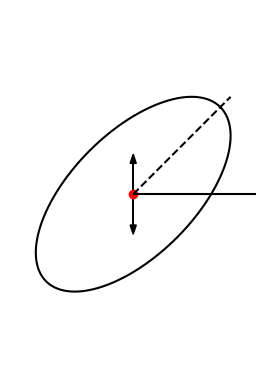

In [39]:
## Making plot of oval to show angle


def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)  
    y_coords = b * np.sin(t) 

    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords

    # Translate vertically to match y-position
    y_coords_rot += y  

    return x_coords_rot, y_coords_rot

a, b, theta = 2, 1, np.pi/4
x, y = build_oval(a, b, theta=theta)
plt.plot(x, y, color='black')
plt.plot([0, np.sqrt(a**2+b**2)*np.cos(theta)], [0, np.sqrt(a**2+b**2)*np.sin(theta)], linestyle='--', color='black')
plt.hlines(y=0, xmin=0, xmax=2, color='black')
plt.arrow(x=0, y=0, dy=0.5, dx=0, head_width=0.1, color='black')
plt.arrow(x=0, y=0, dy=-0.5, dx=0, head_width=0.1, color='black')
plt.scatter(0, 0, color='red')
plt.ylim(-3, 3)
plt.xlim(-2, 2)
plt.axis('off')
plt
plt.gca().set_aspect('equal')
plt.show()

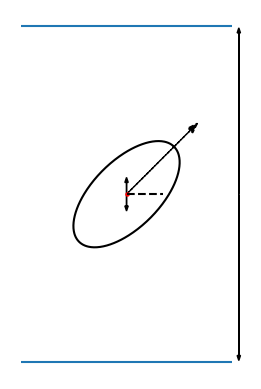

In [143]:
### Making plot of oval in a channel
plt.hlines([0, 10], xmin=-np.pi, xmax=np.pi)
a, b, theta = 2, 1, np.pi/4
x, y = build_oval(a, b, theta=theta, y=5)
plt.plot(x, y, color='black')
# plt.plot([0, 1.2*np.sqrt(a**2+b**2)*np.cos(theta)], [5, 1.2*np.sqrt(a**2+b**2)*np.sin(theta)+5], linestyle='--', color='black')
plt.arrow(x=0, dx=1.2*np.sqrt(a**2+b**2)*np.cos(theta), y=5, dy=1.2*np.sqrt(a**2+b**2)*np.sin(theta), 
          linestyle='--', color='black', head_width=0.2)
plt.hlines(5, 0, 1.1, color='black', linestyle='--')
plt.arrow(x=0, y=5, dy=0.35, dx=0, head_width=0.1, color='black') # oval arrows
plt.arrow(x=0, y=5, dy=-0.35, dx=0, head_width=0.1, color='black')
plt.arrow(x=+np.pi+0.2, y=5, dy=4.8, dx=0, head_width=0.1, color='black') # Height arrows
plt.arrow(x=+np.pi+0.2, y=5, dy=-4.8, dx=0, head_width=0.1, color='black')

plt.scatter(0, 5, color='red', s=5)
plt.axis('off')

plt.gca().set_aspect('equal')


In [ ]:
trajectories = pd.read_csv("data/simulations_baseline-04-03-2025.csv")

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import time

# Function to generate an oval at a given theta and y
def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)  
    y_coords = b * np.sin(t) 

    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords

    # Translate vertically to match y-position
    y_coords_rot += y  

    return x_coords_rot, y_coords_rot

# Function to animate and save as GIF
def animate_trajectory_and_oval_gif(trajectory, a=1, b=0.5, lower_bounds=None, upper_bounds=None, xlim=None, ylim=None, dt=0.05, save_path="oval_trajectory.gif"):

    fig, ax = plt.subplots(figsize=(12, 6))
    plt.gca().set_aspect('equal')
    # Set axis limits
    if xlim is None:
        xlim = (np.min(trajectory[:, 0]) - 1, np.max(trajectory[:, 0]) + 1)
    if ylim is None:
        ylim = (np.min(trajectory[:, 1]) - 1, np.max(trajectory[:, 1]) + 1)

    ax.set_xlim(-2*a, 2*a)  # Adjust horizontal limits based on oval size
    ax.set_ylim(*ylim)

    ax.hlines([ylim[0], ylim[1]], xmin=-2, xmax=2, color='black', linestyle='-')
    ax.axis('off')

    # Initialize plot elements
    oval_patch, = ax.plot([], [], 'b-', lw=2, label="Oval")
    center_dot, = ax.plot([], [], 'ro', markersize=5, label="Center")
    # trajectory_path, = ax.plot([], [], 'r-', lw=2, alpha=0.6, label="Path")

    # Store the center trace
    center_x_path, center_y_path = [], []

    # Update function for animation
    def update(step_i):
        theta, y = trajectory[step_i]

        # Compute oval shape
        oval_x, oval_y = build_oval(a, b, theta, y)

        # Update oval plot
        oval_patch.set_data(oval_x, oval_y)
        center_dot.set_data([0], [y])  # The center of the oval at x=0

        # Store center path
        center_x_path.append(0)
        center_y_path.append(y)
        # trajectory_path.set_data(center_x_path, center_y_path)

        # Update title
        # ax.set_title(f"Oval Moving in Channel - Step {step_i+1}/{len(trajectory)}")

        return oval_patch, center_dot

    # Create animation
    ani = animation.FuncAnimation(fig, update, frames=len(trajectory), interval=dt * 1000, blit=True)

    # Save animation as GIF
    ani.save(save_path, writer="pillow", fps=int(1/dt))

    print(f"Animation saved as {save_path}")
    plt.close(fig)  # Close the figure after saving

# Generate trajectory (example)
trajectory = trajectories.loc[trajectories['simulation']==2][['theta', 'y']].to_numpy()
trajectory_plot = trajectory[::10]
# Run animation and save as GIF
animate_trajectory_and_oval_gif(trajectory_plot, a=1, b=0.5, ylim=[0.5, 9.5], dt=0.01, save_path="oval_moving_1st.gif")


Animation saved as oval_moving_1st.gif


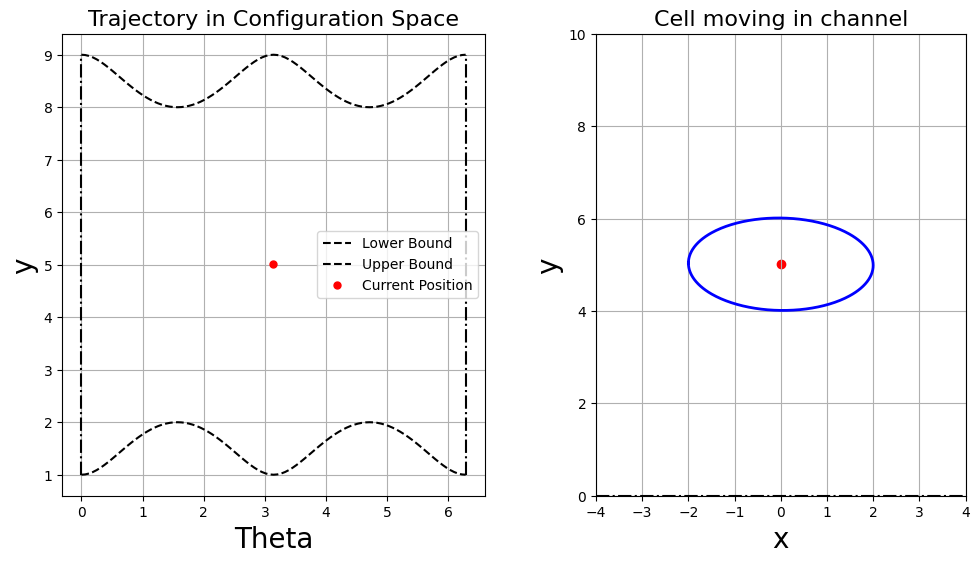

In [133]:
## Obtain example cell dynamics
# For plotting a single trajectory to see how it's working out
from IPython.display import display, clear_output
import time



def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)  
    y_coords = b * np.sin(t) 

    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords

    # Translate vertically to match y-position
    y_coords_rot += y  

    return x_coords_rot, y_coords_rot

def animate_trajectory_and_oval(trajectory, a=1, b=0.5, lower_bounds=None, upper_bounds=None, xlim=None, ylim=None, dt=0.05):

    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    
    if xlim is None:
        xlim = (np.min(trajectory[:, 0]) - 1, np.max(trajectory[:, 0]) + 1)
    if ylim is None:
        ylim = (np.min(trajectory[:, 1]) - 1, np.max(trajectory[:, 1]) + 1)
    
    ax1.set_xlim(*xlim)
    ax1.set_ylim(*ylim)
    ax2.set_xlim(-2*a, 2*a)  # Adjust horizontal limits based on oval size
    ax2.set_ylim(*ylim)

    for step_i in range(len(trajectory)):
        # Clear previous frame
        clear_output(wait=True)
        ax1.clear()
        ax2.clear()

        # Update oval plot bounds because it clears them every time
        ax2.set_xlim(-2*a, 2*a)
        ax2.set_ylim(*ylim)

        # Extract current values
        theta, y = trajectory[step_i]

        # Extract trajectory so far
        x_vals = trajectory[:step_i+1, 0]
        y_vals = trajectory[:step_i+1, 1]

        # Plot bounds on trajectory space
        if lower_bounds is not None:
            ax1.plot(lower_bounds[0], lower_bounds[1], 'k--', label="Lower Bound")
        
        if upper_bounds is not None:
            ax1.plot(upper_bounds[0], upper_bounds[1], 'k--', label="Upper Bound")

        # Plot the trajectory in (theta, y) space
        # ax1.plot(x_vals, y_vals, 'g-', lw=1.5, alpha=0.7, label="Trajectory")  # Past trajectory
        ax1.plot(theta, y, 'ro', ms=5, label="Current Position")  # Moving point
        ax1.vlines([0, np.pi*2], ymin=1, ymax=9, linestyle='-.', color='black')

        # Generate and plot the oval in real space
        oval_x, oval_y = build_oval(a, b, theta, y)
        ax2.plot(oval_x, oval_y, 'b-', lw=2, label="Oval")
        ax2.scatter(0, y, color='red')
        ax2.axhline(0, color='black', linestyle='-.')  # Reference line


        # Set titles and labels
        ax1.set_title("Trajectory in Configuration Space", fontsize=16)
        ax1.set_xlabel("Theta", fontsize=20)
        ax1.set_ylabel("y", fontsize=20)
        ax1.legend()
        ax1.grid(True)

        ax2.set_title("Cell moving in channel", fontsize=16)
        ax2.set_xlabel("x", fontsize=20)
        ax2.set_ylabel("y", fontsize=20)
        ax2.set_aspect('equal', 'box')
        # ax2.legend()
        ax2.grid(True)

        # title
        # fig.suptitle(f"Step {step_i+1}/{len(trajectory)}", fontsize=14, fontweight='bold')

        # Display updated figure
        display(fig)
        time.sleep(dt)  # Control animation speed

    plt.close(fig)  # Close figure after animation completes

W = 2*np.pi
H = 10
a, b = 2, 1
oval_vert_dist = lambda a, b, theta: abs(np.sqrt(a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2))
lower_bound = lambda a, b, theta: 0 + oval_vert_dist(a, b, theta)
upper_bound = lambda a, b, theta: H - oval_vert_dist(a, b, theta)

trajectories = pd.read_csv("data/simulations_baseline-04-03-2025.csv")
trajectory = trajectories.loc[trajectories['simulation']==0][['theta', 'y']].to_numpy()
trajectory = trajectory[::10]
x_grid = np.linspace(0, W, 101)
animate_trajectory_and_oval(trajectory[0:2,:], a=a, b=b, lower_bounds=[x_grid, lower_bound(a, b, x_grid)],
                            upper_bounds=[x_grid, upper_bound(a, b, x_grid)], xlim=[-5, 5], ylim=[0,H],
                            dt=0.01)
# Choose 700 steps from onwards
# 3300 steps later too
#


In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# -------------------------
# 1) Oval builder function (same as before)
def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)
    y_coords = b * np.sin(t)
    
    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords
    
    # Translate vertically to match y-position
    y_coords_rot += y  
    return x_coords_rot, y_coords_rot

# -------------------------
# 2) Animation function that saves the output as a GIF
def animate_trajectory_and_oval_gif(trajectory, a=1, b=0.5, 
                                      lower_bounds=None, upper_bounds=None, 
                                      xlim=None, ylim=None, dt=0.05, 
                                      save_path="example_trajectory.gif"):
    """
    Creates an animation of the trajectory and the rolling oval,
    and saves the result as a GIF.
    """
    # Create figure with two subplots: left (configuration space) and right (real space)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Set axis limits for configuration space (ax1)
    if xlim is None:
        xlim = (np.min(trajectory[:, 0]) - 1, np.max(trajectory[:, 0]) + 1)
    if ylim is None:
        ylim = (np.min(trajectory[:, 1]) - 1, np.max(trajectory[:, 1]) + 1)
    # ax1.set_xlim(0, 2*np.pi)
    ax1.set_ylim(*ylim)
    
    # For real space (ax2), set horizontal limits based on oval size
    ax2.set_xlim(-2*a, 2*a)
    ax2.set_ylim(*ylim)
    
    # Plot static elements in configuration space (ax1)
    if lower_bounds is not None:
        ax1.plot(lower_bounds[0], lower_bounds[1], 'k--', label="Lower Bound")
    if upper_bounds is not None:
        ax1.plot(upper_bounds[0], upper_bounds[1], 'k--', label="Upper Bound")
    ax1.set_title("Trajectory in Configuration Space", fontsize=16)
    ax1.set_xlabel("Theta", fontsize=20)
    ax1.set_ylabel("y", fontsize=20)
    ax1.vlines([0, np.pi*2], ymin=1, ymax=9, linestyle='-.', color='black')
    
    ax1.grid(True)
    
    # Plot static elements in real space (ax2)
    ax2.axhline(0, color='black', linestyle='--')
    ax2.set_title("Cell Moving in Channel", fontsize=16)
    ax2.set_xlabel("x", fontsize=20)
    ax2.set_ylabel("y", fontsize=20)
    ax2.set_aspect('equal', 'box')
    ax2.grid(True)
    
    # Create dynamic artists:
    # In configuration space: the past trajectory (green line) and the current position (red dot)
    traj_line, = ax1.plot([], [], 'g-', lw=1.5, alpha=0.7)
    current_pos, = ax1.plot([], [], 'ro', ms=5, label="Current Position")
    center_dot, = ax2.plot([], [], 'ro', ms=5, label="Oval Center")
    ax1.legend()
    # In real space: the oval (blue line)
    oval_line, = ax2.plot([], [], 'b-', lw=2, label="Oval")
    
    # A suptitle to display the current frame number
    suptitle = fig.suptitle("", fontsize=14, fontweight='bold')
    
    # Initialization function: clear the dynamic artists.
    def init():
        traj_line.set_data([], [])
        current_pos.set_data([], [])
        center_dot.set_data([], [])
        oval_line.set_data([], [])
        suptitle.set_text("")
        return traj_line, current_pos, oval_line, suptitle
    
    # Update function: called for each frame
    def update(frame):
        # In configuration space, update the trajectory and current position.
        x_vals = trajectory[:frame+1, 0]
        y_vals = trajectory[:frame+1, 1]
        traj_line.set_data(x_vals, y_vals)
        current_theta = trajectory[frame, 0]
        current_y = trajectory[frame, 1]
        current_pos.set_data([current_theta], [current_y])
        
        # In real space, compute and update the oval based on current theta and y.
        oval_x, oval_y = build_oval(a, b, current_theta, current_y)
        oval_line.set_data(oval_x, oval_y)
        center_dot.set_data([0], [current_y])
        
        # Update the suptitle with the frame information.
        suptitle.set_text(f"Step {frame+1}/{len(trajectory)}")
        return traj_line, current_pos, oval_line, suptitle
    
    # Create the animation using FuncAnimation.
    ani = FuncAnimation(fig, update, frames=len(trajectory), init_func=init, 
                        interval=dt*1000, blit=True)
    
    # Save the animation as a GIF using PillowWriter.
    writer = PillowWriter(fps=int(1/dt))
    ani.save(save_path, writer=writer)
    print("Animation saved as", save_path)
    
    plt.close(fig)  # Close the figure once saved

# -------------------------
# 3) Example usage
# Load trajectory data (adjust path as needed)
# trajectories = pd.read_csv("data/simulations_baseline-04-03-2025.csv")
# For this example, we assume 'trajectories' is already loaded.
trajectory = trajectories.loc[trajectories['simulation'] == 0][['theta', 'y']].to_numpy()
trajectory = trajectory[::10]  # take every 10th point

W = 2 * np.pi
H = 10
a, b = 2, 1
oval_vert_dist = lambda a, b, theta: np.abs(np.sqrt(a**2 * np.sin(theta)**2 + b**2 * np.cos(theta)**2))
lower_bound = lambda a, b, theta: 0 + oval_vert_dist(a, b, theta)
upper_bound = lambda a, b, theta: H - oval_vert_dist(a, b, theta)
x_grid = np.linspace(0, W, 101)

animate_trajectory_and_oval_gif(
    trajectory, a=a, b=b, 
    lower_bounds=[x_grid, lower_bound(a, b, x_grid)],
    upper_bounds=[x_grid, upper_bound(a, b, x_grid)],
    xlim=[-5, 5], ylim=[0, H],
    dt=0.01, save_path="example_trajectory_v2.gif"
)


Animation saved as example_trajectory_v2.gif


(np.float64(-0.3141592653589793),
 np.float64(6.5973445725385655),
 np.float64(0.6),
 np.float64(9.4))

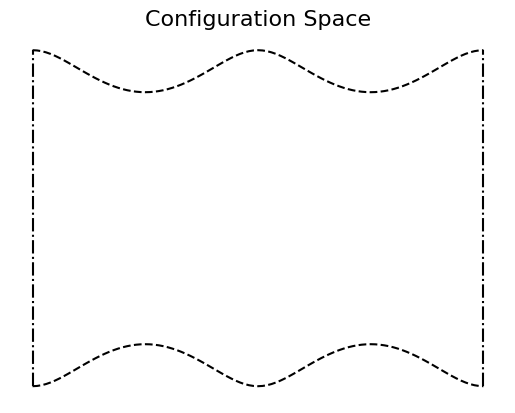

In [135]:
## Making pdf boundary and conditions for it

H = 10 # height/distance of upper bound from lower bound
a = a
b = b

oval_vert_dist = lambda a, b, theta: abs(np.sqrt(a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2))
lower_bound = lambda a, b, theta: 0 + oval_vert_dist(a, b, theta)
upper_bound = lambda a, b, theta: H - oval_vert_dist(a, b, theta)

y = np.linspace(0, 10, 101)
theta = np.linspace(0, 2*np.pi, 101)
upper_bound_points = np.array([H  - abs(oval_vert_dist(a, b, th)) for th in theta])
lower_bound_points = np.array([0 + abs(oval_vert_dist(a, b, th)) for th in theta]) # 0 because I implicitly assume that the lower bound is 0

# normal_angle = lambda a, b, theta: (np.cos(theta)*np.sin(theta)*(b**2 - a**2))/ \
#     (np.sqrt(a**2*np.cos(theta)**2 + b**2*np.sin(theta)**2))
# theta_norm = np.linspace(0, 2*np.pi, 21)
# y_norm = np.array([abs(y_topmost(a, b, th)) for th in theta_norm])
# normal_vectors = np.array([[normal_angle(a, b, th), 1] for th in theta_norm])
# tangent_vectors = np.array([[1, -normal_angle(a, b, th)] for th in theta_norm])

fig, ax = plt.subplots()
ax.plot(theta, upper_bound_points, linestyle='--', color='black')
ax.plot(theta, lower_bound_points, linestyle='--', color='black')
ax.vlines([0, np.pi*2], ymin=b, ymax=H - b, linestyles='-.', color='black')
# ax.quiver(theta_norm, y_norm, normal_vectors[:, 0], normal_vectors[:, 1])
# ax.quiver(theta_norm, y_norm, tangent_vectors[:, 0], tangent_vectors[:, 1], color='red')
# ax.xlabel("theta")
# ax.ylabel("y")
# ax.set_aspect('equal')
plt.title("Configuration Space", fontsize=16)
plt.axis('off')



In [ ]:
# Consolidating the fokker-planck and monte carlo results
df1 = pd.read_csv("data/simulations_baseline-04-03-2025.csv")
df2 = pd.read_csv("data/simulations_baseline_ii_-04-03-2025.csv")
df3 = pd.read_csv("data/simulations_baseline_iii_-04-03-2025.csv")
df_fk = pd.read_csv("data/baseline_final_this_time_extremely_fine.csv")

dataframes = [df1, df2, df3]

# Extract final (theta, y) values for each simulation
final_positions = []

for df in dataframes:
    final_pos = df.groupby("simulation").agg({"theta": "last", "y": "last"})
    final_positions.append(final_pos)

# Combine all final positions into one DataFrame
final_positions = pd.concat(final_positions)

# Extract theta and y values
theta_final = final_positions["theta"].values
y_final = final_positions["y"].values



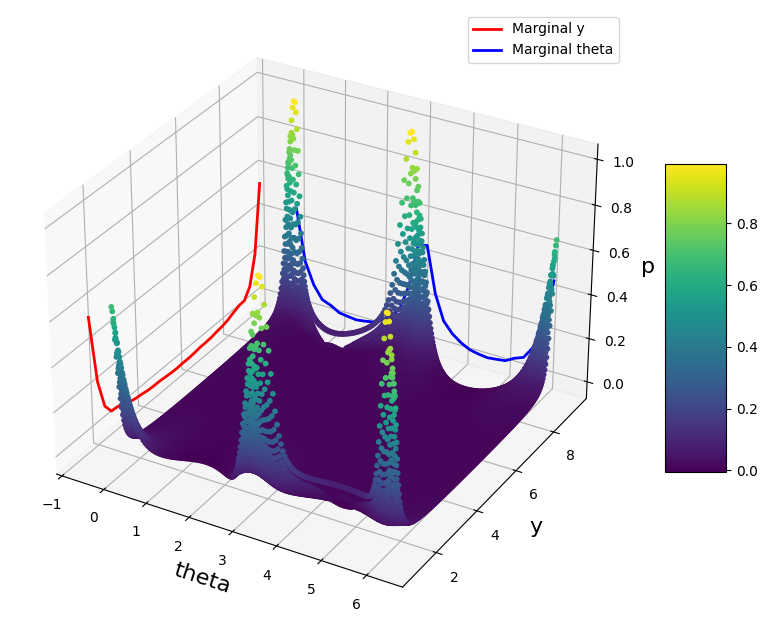

In [136]:
x = df_fk['x']
y = df_fk['y']
u = df_fk['u']
# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Compute marginal distributions by binning with weights (u values)
num_bins = 30

# Marginal over x
bins_x = np.linspace(x.min(), x.max(), num_bins+1)
hist_x, edges_x = np.histogram(x, bins=bins_x, weights=u)
centers_x = (edges_x[:-1] + edges_x[1:]) / 2
widths_x = np.diff(edges_x)
area_x = np.sum(hist_x * widths_x)
marginal_x = hist_x / area_x  # normalize so the area = 1

# Marginal over y
bins_y = np.linspace(y.min(), y.max(), num_bins+1)
hist_y, edges_y = np.histogram(y, bins=bins_y, weights=u)
centers_y = (edges_y[:-1] + edges_y[1:]) / 2
widths_y = np.diff(edges_y)
area_y = np.sum(hist_y * widths_y)
marginal_y = hist_y / area_y

# Choose offsets so the marginal curves appear along the edges
# For marginal_x: keep x positions but set y at a constant offset below the data
offset_y = y.min() - (y.max()-y.min())*0.1  # adjust factor as needed

# For marginal_y: keep y positions but set x at a constant offset to the left of the data
offset_x = x.min() - (x.max()-x.min())*0.1  # adjust factor as needed

# Plot marginal_y along the y-axis edge (varying y and u, fixed x)
ax.plot(np.full_like(centers_y, offset_x), centers_y, marginal_y,
        color='red', lw=2, label='Marginal y')

sc = ax.scatter(x, y, u, c=u, cmap='viridis', s=10, depthshade=False, zorder=1)
fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
ax.set_xlabel('theta', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('p', fontsize=16)
# plt.title("Stationary distribution with marginals along axes")

# Plot marginal_x along the x-axis edge (varying x and u, fixed y)
ax.plot(centers_x, np.full_like(centers_x, offset_y)+9, marginal_x,
        color='blue', lw=2, label='Marginal theta', zorder=2)

ax.legend()
plt.show()

In [129]:
theta_df = pd.DataFrame({
    'theta': centers_x,
    'p': marginal_x
})
y_df = pd.DataFrame({
    'y': centers_y,
    'p': marginal_y
})
theta_df.to_csv("data/theta_marginal.csv")
y_df.to_csv("data/y_marginal.csv")

In [106]:
# # Set up figure
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# # Surface plot of u(x, y)
# ax.plot_surface(X, Y, U, cmap='viridis', edgecolor='none', alpha=0.8)

# # Marginal P(x) - Add as a line plot on X-axis
# ax.plot(x_unique, np.full_like(x_unique, y_unique.min()), P_x, color='blue', lw=2, label='p(theta)')

# # Marginal P(y) - Add as a line plot on Y-axis
# ax.plot(np.full_like(y_unique, x_unique.min()), y_unique, P_y, color='red', lw=2, label='p(y)')

# # Labels
# ax.set_xlabel("theta")
# ax.set_ylabel("y")
# ax.set_zlabel("p(x, y)")
# ax.set_title("Stationary distribution with marginal distributions along axes")
# ax.legend()

# plt.show()


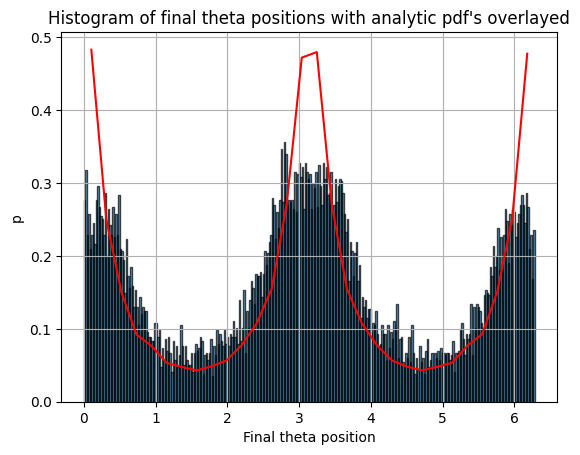

In [123]:
plt.hist(theta_final, bins=300, edgecolor='black', alpha=0.7, density=True)
plt.plot(centers_x, marginal_x, label='Fokker-Planck marginal', color='red')
plt.xlabel("Final theta position")
plt.ylabel("p")
plt.title("Histogram of final theta positions with analytic pdf's overlayed")
# plt.legend()
plt.grid(True)
plt.show()

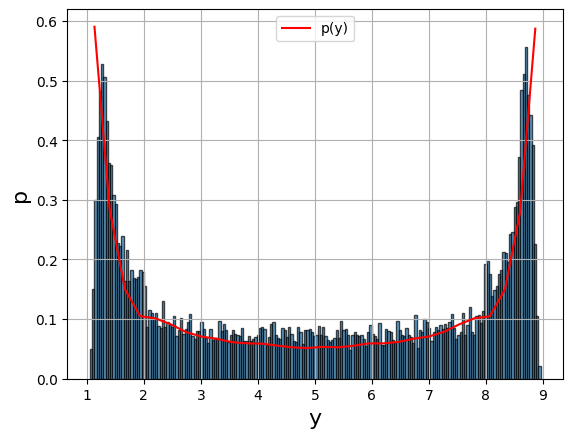

In [140]:
plt.hist(y_final, bins=200, edgecolor='black', alpha=0.7, density=True)
plt.plot(centers_y, marginal_y, label='p(y)', color='red')
plt.xlabel("y", fontsize=16)
plt.ylabel("p", fontsize=16)
# plt.title("y positions with analytic pdf overlayed", fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

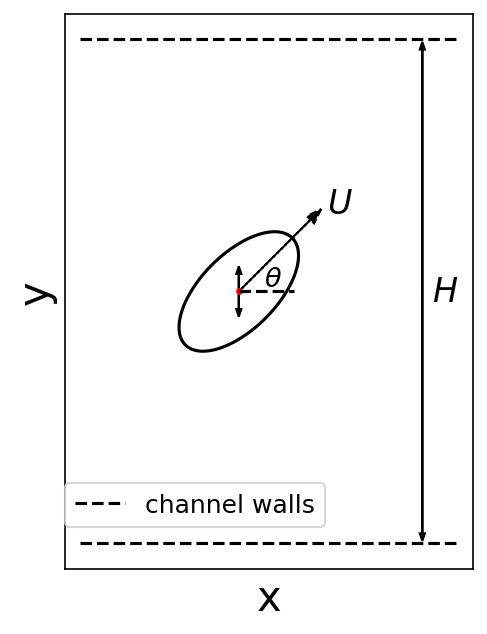

In [270]:
## Making report plots

def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)  
    y_coords = b * np.sin(t) 

    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords

    # Translate vertically to match y-position
    y_coords_rot += y  

    return x_coords_rot, y_coords_rot

### Making plot of oval in a channel
plt.hlines([0, 10], xmin=-np.pi, xmax=np.pi+1.2, color='black', linestyle='--', label='channel walls')
a, b, theta = 1.5, 0.75, np.pi/4
x, y = build_oval(a, b, theta=theta, y=5)
plt.plot(x, y, color='black')
plt.arrow(x=0, dx=1.2*np.sqrt(a**2+b**2)*np.cos(theta), y=5, dy=1.2*np.sqrt(a**2+b**2)*np.sin(theta), 
          linestyle='--', color='black', head_width=0.2)
plt.hlines(5, 0, 1.1, color='black', linestyle='--')
plt.arrow(x=0, y=5, dy=0.35, dx=0, head_width=0.1, color='black') # oval arrows
plt.arrow(x=0, y=5, dy=-0.35, dx=0, head_width=0.1, color='black')
plt.arrow(x=+np.pi+0.5, y=5, dy=4.8, dx=0, head_width=0.1, color='black') # Height arrows
plt.arrow(x=+np.pi+0.5, y=5, dy=-4.8, dx=0, head_width=0.1, color='black')
plt.text(x=np.pi + 0.7, y=5, s=r"$H$", fontsize=16, verticalalignment='center')
plt.text(x=0.5, y = 5.25, s=r"$\theta$", fontsize=13, verticalalignment='center')
plt.text(x=1.75, y=6.75, s=r"$U$", fontsize=16, verticalalignment='center')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.yticks([])
plt.xticks([])
plt.legend(loc=(0,0.075), fontsize=12)
plt.xlim(-np.pi-0.3, np.pi + 1.5)

plt.scatter(0, 5, color='red', s=5)
# plt.axis('off')

plt.gca().set_aspect('equal')
plt.rcParams['savefig.dpi'] = 500  # Default DPI for saved figures
plt.rcParams['figure.dpi'] = 150   # DPI for on-screen display
plt.rcParams['pdf.fonttype'] = 42  # Ensures fonts are embedded in PDFs
plt.savefig("report/graphics/model1_setup.png", dpi=500, bbox_inches='tight')


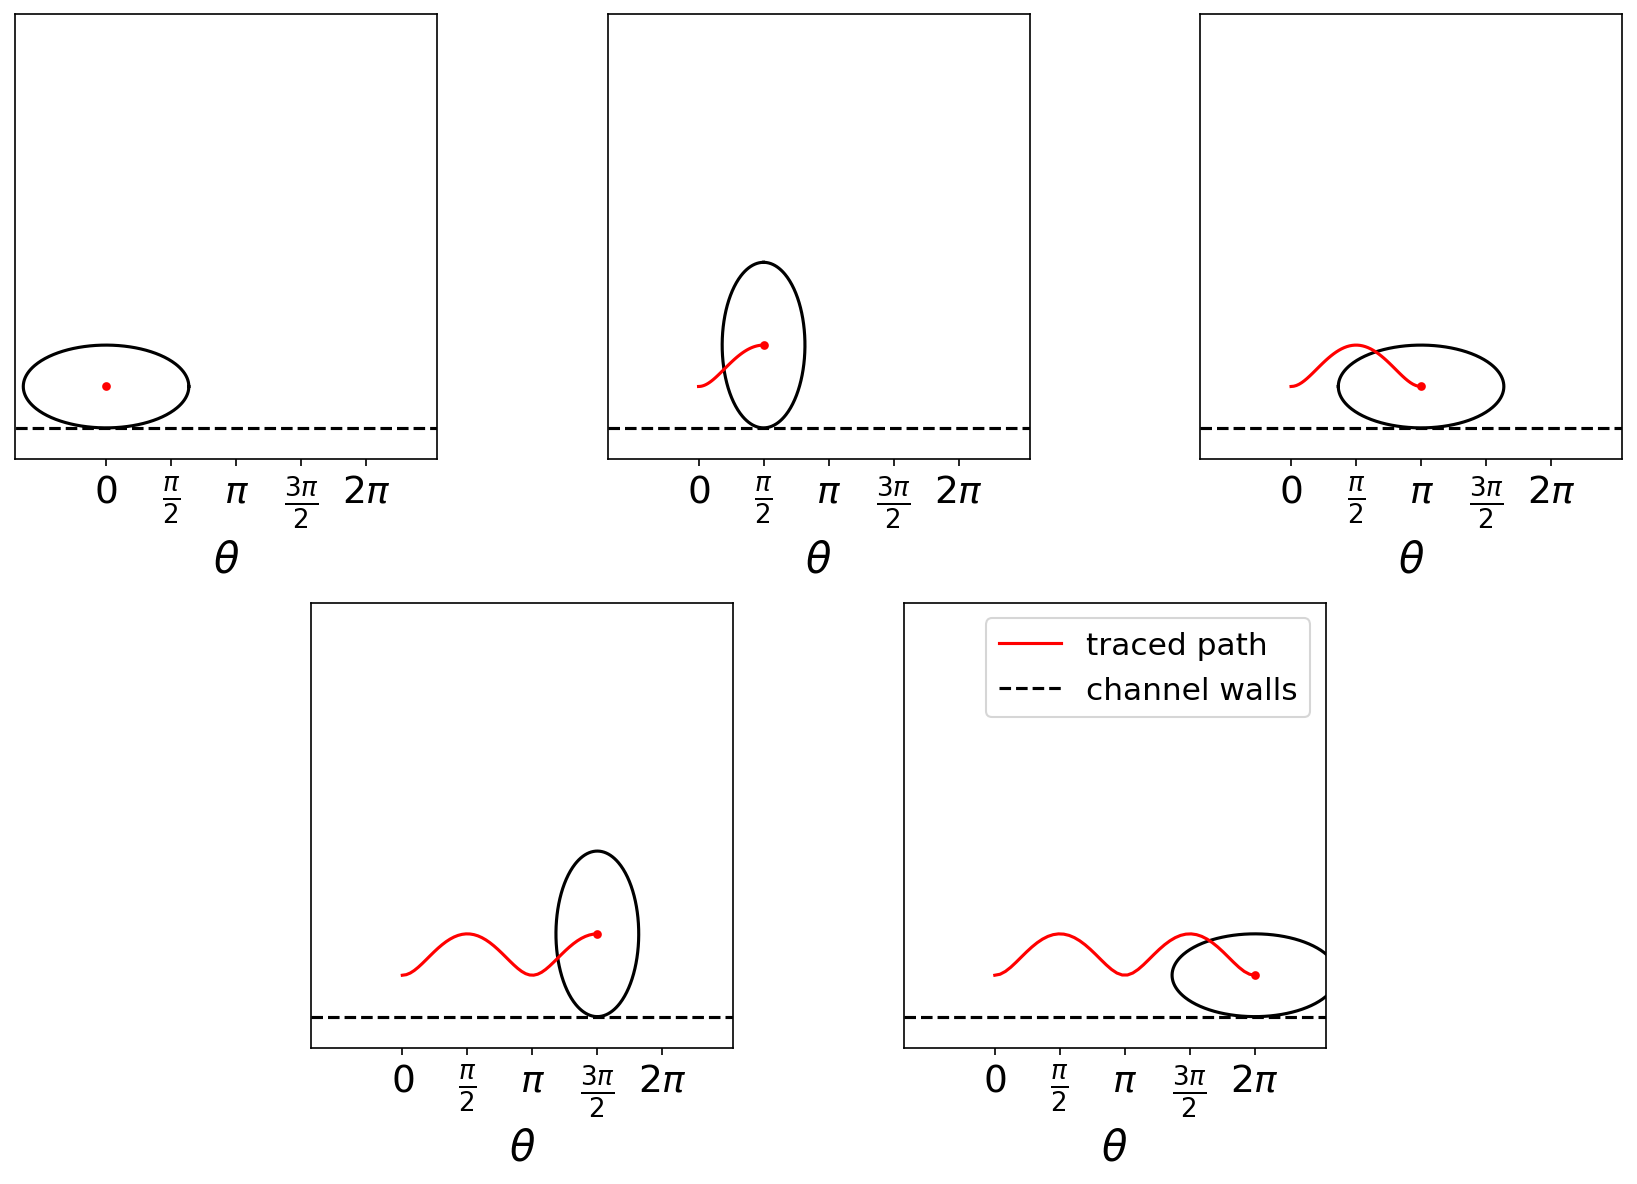

In [266]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Function to generate an oval at a given theta and y
def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)  
    y_coords = b * np.sin(t) 

    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords

    # Translate vertically to match y-position
    y_coords_rot += y  
    x_coords_rot_trans = x_coords_rot + theta

    return x_coords_rot_trans, y_coords_rot


oval_vert_dist = lambda a, b, theta: abs(np.sqrt(a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2))
lower_bound = lambda a, b, theta: 0 + oval_vert_dist(a, b, theta)

a, b = 2, 1
thetas = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]

fig = plt.figure(figsize=(12, 8))
gs = gridspec.GridSpec(nrows=2, ncols=6)
# Positions for first row (3 plots)
positions_top_row = [(0, slice(0, 2)), (0, slice(2, 4)), (0, slice(4, 6))]

# Positions for second row (2 plots, centered)
positions_bottom_row = [(1, slice(1, 3)), (1, slice(3, 5))]

positions = positions_top_row + positions_bottom_row

for i, theta in enumerate(thetas):
    row, col = positions[i]
    ax = fig.add_subplot(gs[row, col])
    y = 1 + abs(np.sin(theta))
    oval_x, oval_y = build_oval(a, b, theta, y)
    ax.plot(oval_x, oval_y, color='black')
    ax.set_xticks(np.arange(0, 2*np.pi + 0.01, np.pi/2))
    ax.set_xticklabels(['$0$', r'$\frac{\pi}{2}$', r'$\pi$', 
                    r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=18)
    x_trace = np.linspace(0, theta, 50)
    y_trace = np.array([lower_bound(a, b, th) for th in x_trace])
    plt.plot(x_trace, y_trace, color='red', label='traced path')

    plt.scatter(theta, y, color='red', s=10)

    ax.set_ylim((-0.75, 10))
    ax.set_xlim((-2.2, 8))
    ax.set_aspect('equal')
    ax.set_xlabel(r'$\theta$', fontsize=20)
    ax.yaxis.set_visible(False)
    ax.hlines(0, -5, 20, color='black', linestyle='--', label='channel walls')

plt.legend(fontsize=15)
plt.tight_layout()
plt.savefig('report/graphics/rolling_oval.png')
plt.show()


# lower_bounds_x_1 = np.linspace(0, theta1, 101)
# lower_bounds_y_1 = [lower_bound(a, b, th) for th in lower_bounds_x_1]
# plt.plot(lower_bounds_x_1, lower_bounds_y_1, color='red')
# plt.ylim((-1,10))
# plt.xlim((0, 2*np.pi))
# plt.hlines(0, -1, 5, color='black', linestyle='--')



/var/folders/l5/rhh7z5c528b5hjwqy30m3vzr0000gn/T/ipykernel_36933/2688761563.py:51: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(oval_x, oval_y, 'b-', lw=2, color='black')


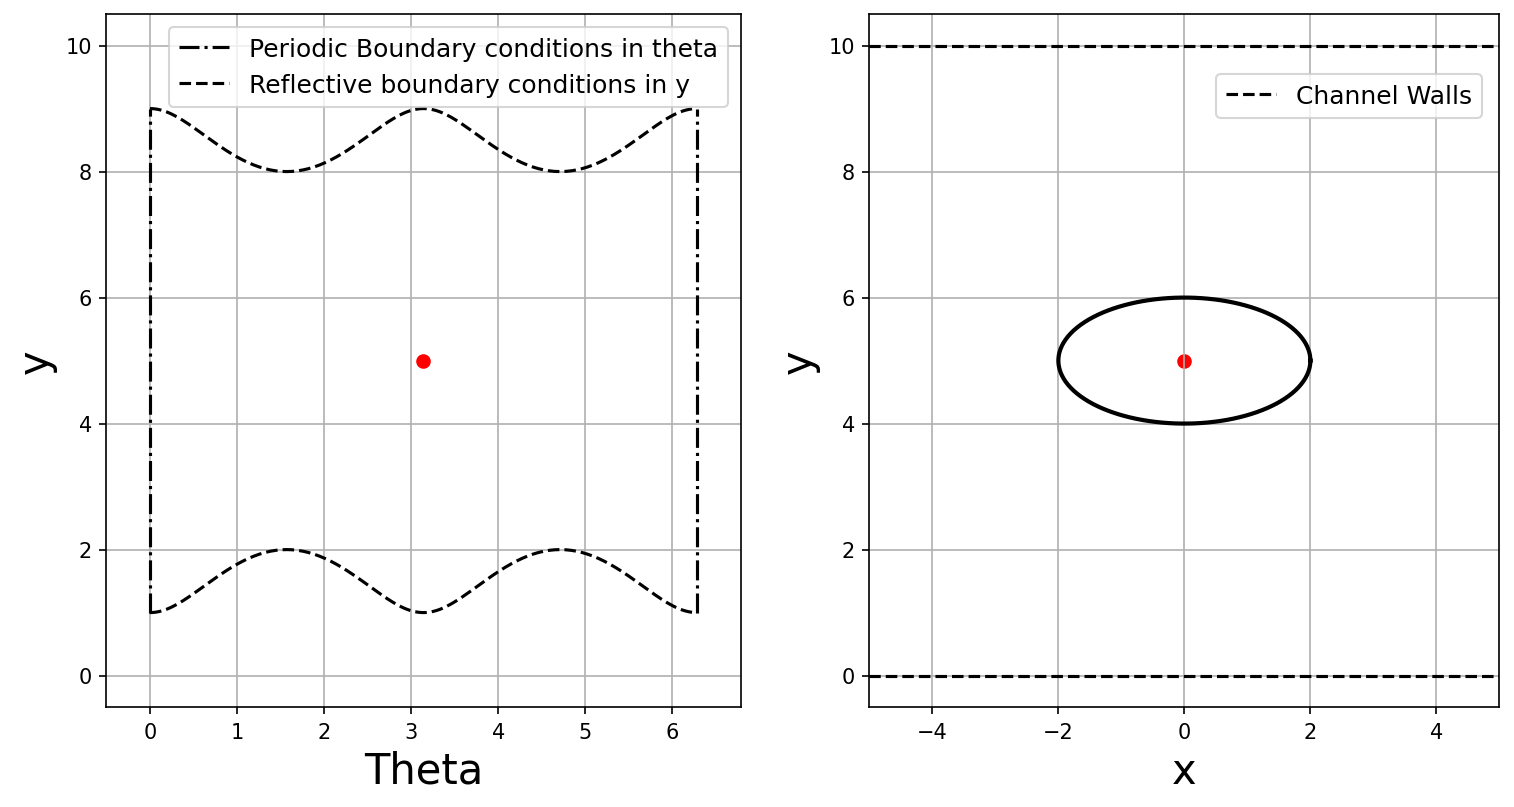

In [264]:
## Obtain example cell dynamics
# For plotting a single trajectory to see how it's working out
from IPython.display import display, clear_output
import time



def build_oval(a, b, theta=0, y=0):
    """Generates the coordinates for an oval rotated by theta and shifted to height y."""
    t = np.linspace(0, 2 * np.pi, 360)
    x_coords = a * np.cos(t)  
    y_coords = b * np.sin(t) 

    # Apply rotation matrix
    c, s = np.cos(theta), np.sin(theta)
    x_coords_rot = c * x_coords - s * y_coords
    y_coords_rot = s * x_coords + c * y_coords

    # Translate vertically to match y-position
    y_coords_rot += y  

    return x_coords_rot, y_coords_rot

W = 2*np.pi
H = 10
a, b = 2, 1
oval_vert_dist = lambda a, b, theta: abs(np.sqrt(a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2))
lower_bound = lambda a, b, theta: 0 + oval_vert_dist(a, b, theta)
upper_bound = lambda a, b, theta: H - oval_vert_dist(a, b, theta)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.set_xlim((-0.5, 2*np.pi+0.5))
ax1.set_ylim((-0.5, 10.5))
ax2.set_xlim((-5, 5))  # Adjust horizontal limits based on oval size
ax2.set_ylim((-0.5, 10.5))

# Configuration Space
ax1.vlines([0, 2*np.pi], ymin=1, ymax=9, color='black', linestyle='-.', 
           label='Periodic Boundary conditions in theta')
x_bound_points = np.linspace(0, np.pi*2, 201)
lower_bound_points = np.array([lower_bound(a, b, th) for th in x_bound_points])
upper_bound_points = np.array([upper_bound(a, b, th) for th in x_bound_points])
ax1.plot(x_bound_points, lower_bound_points, color='black', linestyle='--', 
         label='Reflective boundary conditions in y')
ax1.plot(x_bound_points, upper_bound_points, color='black', linestyle='--')
ax1.scatter(np.pi, 5, color='red')

# Channel
oval_x, oval_y = build_oval(a, b, theta, y=5)
ax2.plot(oval_x, oval_y, 'b-', lw=2, color='black')
ax2.scatter(0, y+4, color='red')
ax2.hlines([0,10], xmin=-10, xmax=10, color='black', linestyle='--', label='Channel Walls')


# Set titles and labels
ax1.set_xlabel("Theta", fontsize=20)
ax1.set_ylabel("y", fontsize=20)
ax1.legend(fontsize=12)
ax1.grid(True)

ax2.legend(fontsize=12, loc=(0.55, 0.85))
ax2.set_xlabel("x", fontsize=20)
ax2.set_ylabel("y", fontsize=20)
ax2.set_aspect('equal', 'box')
# ax2.legend()
ax2.grid(True)
fig.savefig('report/graphics/config_space_1.png')

# Choose 700 steps from onwards
# 3300 steps later too
#


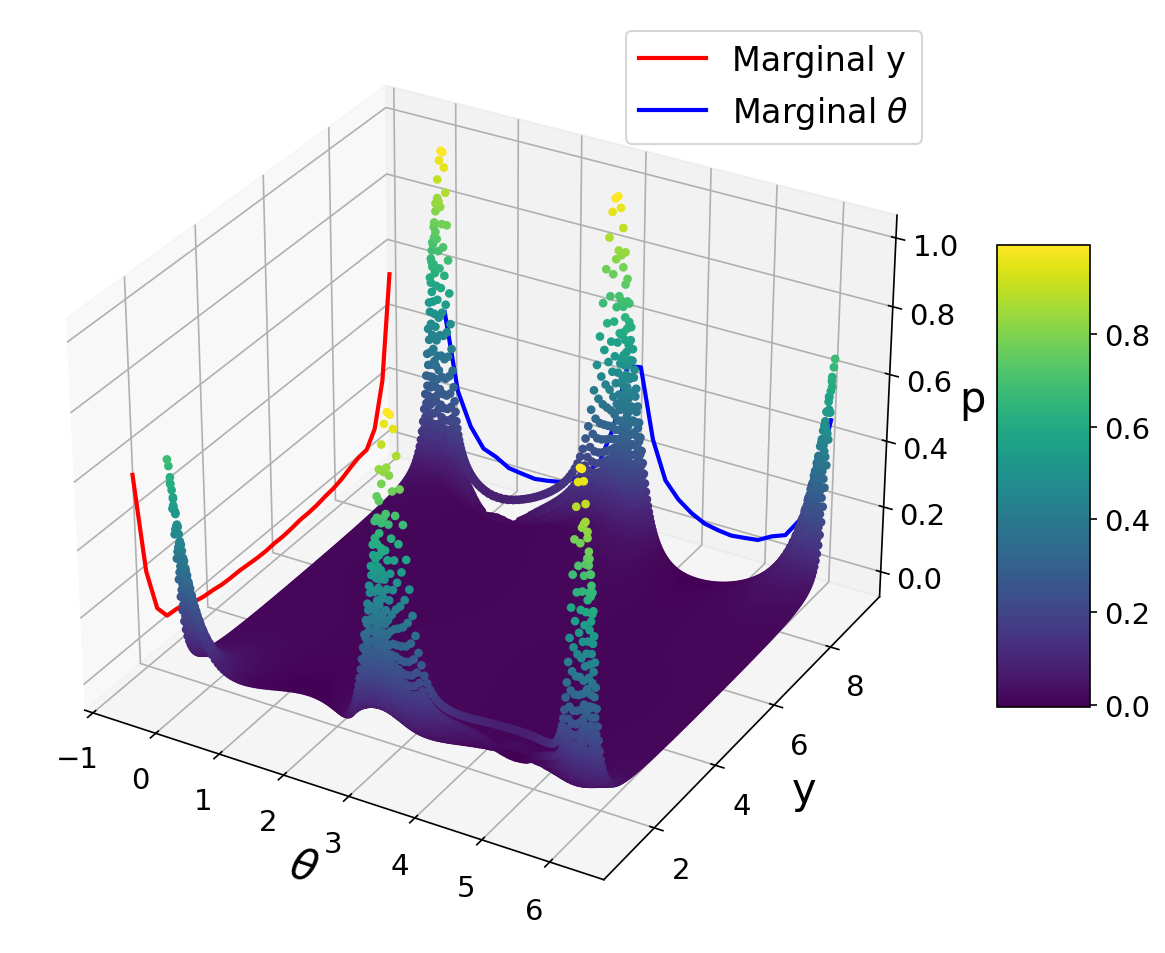

In [284]:
x = df_fk['x']
y = df_fk['y']
u = df_fk['u']
# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Compute marginal distributions by binning with weights (u values)
num_bins = 30

# Marginal over x
bins_x = np.linspace(x.min(), x.max(), num_bins+1)
hist_x, edges_x = np.histogram(x, bins=bins_x, weights=u)
centers_x = (edges_x[:-1] + edges_x[1:]) / 2
widths_x = np.diff(edges_x)
area_x = np.sum(hist_x * widths_x)
marginal_x = hist_x / area_x  # normalize so the area = 1

# Marginal over y
bins_y = np.linspace(y.min(), y.max(), num_bins+1)
hist_y, edges_y = np.histogram(y, bins=bins_y, weights=u)
centers_y = (edges_y[:-1] + edges_y[1:]) / 2
widths_y = np.diff(edges_y)
area_y = np.sum(hist_y * widths_y)
marginal_y = hist_y / area_y

# Choose offsets so the marginal curves appear along the edges
# For marginal_x: keep x positions but set y at a constant offset below the data
offset_y = y.min() - (y.max()-y.min())*0.1  # adjust factor as needed

# For marginal_y: keep y positions but set x at a constant offset to the left of the data
offset_x = x.min() - (x.max()-x.min())*0.1  # adjust factor as needed

# Plot marginal_y along the y-axis edge (varying y and u, fixed x)
ax.plot(np.full_like(centers_y, offset_x), centers_y, marginal_y,
        color='red', lw=2, label='Marginal y')

sc = ax.scatter(x, y, u, c=u, cmap='viridis', s=10, depthshade=False, zorder=1)
cbar = fig.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
cbar.ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\theta$', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('p', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(axis='both', which='minor', labelsize=14)
# plt.title("Stationary distribution with marginals along axes")

# Plot marginal_x along the x-axis edge (varying x and u, fixed y)
ax.plot(centers_x, np.full_like(centers_x, offset_y)+9, marginal_x,
        color='blue', lw=2, label=r'Marginal $\theta$', zorder=2)

ax.legend(fontsize=16)
fig.savefig('report/graphics/model_1_pdf_surface.png')
plt.show()

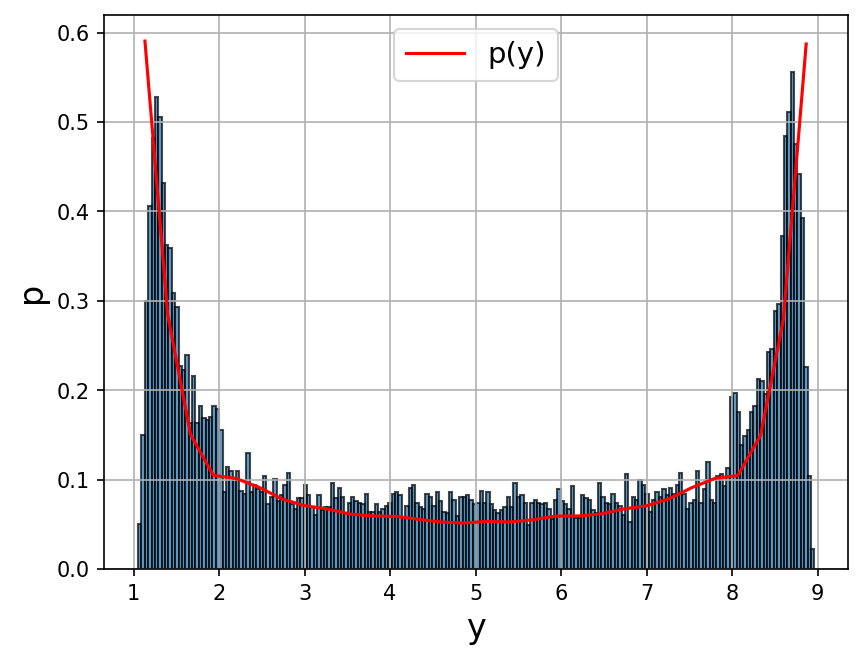

In [281]:
plt.hist(y_final, bins=200, edgecolor='black', alpha=0.7, density=True)
plt.plot(centers_y, marginal_y, label='p(y)', color='red')
plt.xlabel("y", fontsize=16)
plt.ylabel("p", fontsize=16)
# plt.title("y positions with analytic pdf overlayed", fontsize=20)
plt.legend(fontsize=14)
plt.grid(True)
plt.savefig('report/graphics/model_1_marginal_y.png')
plt.show()